In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df_copy = df.copy()

df_copy = df_copy.drop(['id'], axis=1)

imputer = SimpleImputer(strategy='mean')
df_copy['bmi'] = imputer.fit_transform(df_copy[['bmi']])

label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

X = df_copy.drop('stroke', axis=1)
y = df_copy['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
param_grids = {
    "KNN": {
        'n_neighbors': [3],
        'weights': ['distance'],
        'metric': ['manhattan']
    },
    "SVM": {
        'C': [100],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    "Naive Bayes": {},
    "Logistic Regression": {
        'C': [1],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'criterion': ['gini'],
        'max_depth': [20],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    "Random Forest": {
        'n_estimators': [200],
        'max_depth': [30],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }
}

models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


Training and evaluating KNN with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       975
           1       0.85      0.96      0.90       970

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945


Accuracy for KNN: 0.8982005141388175
ROC AUC Score for KNN: 0.9436574147501983


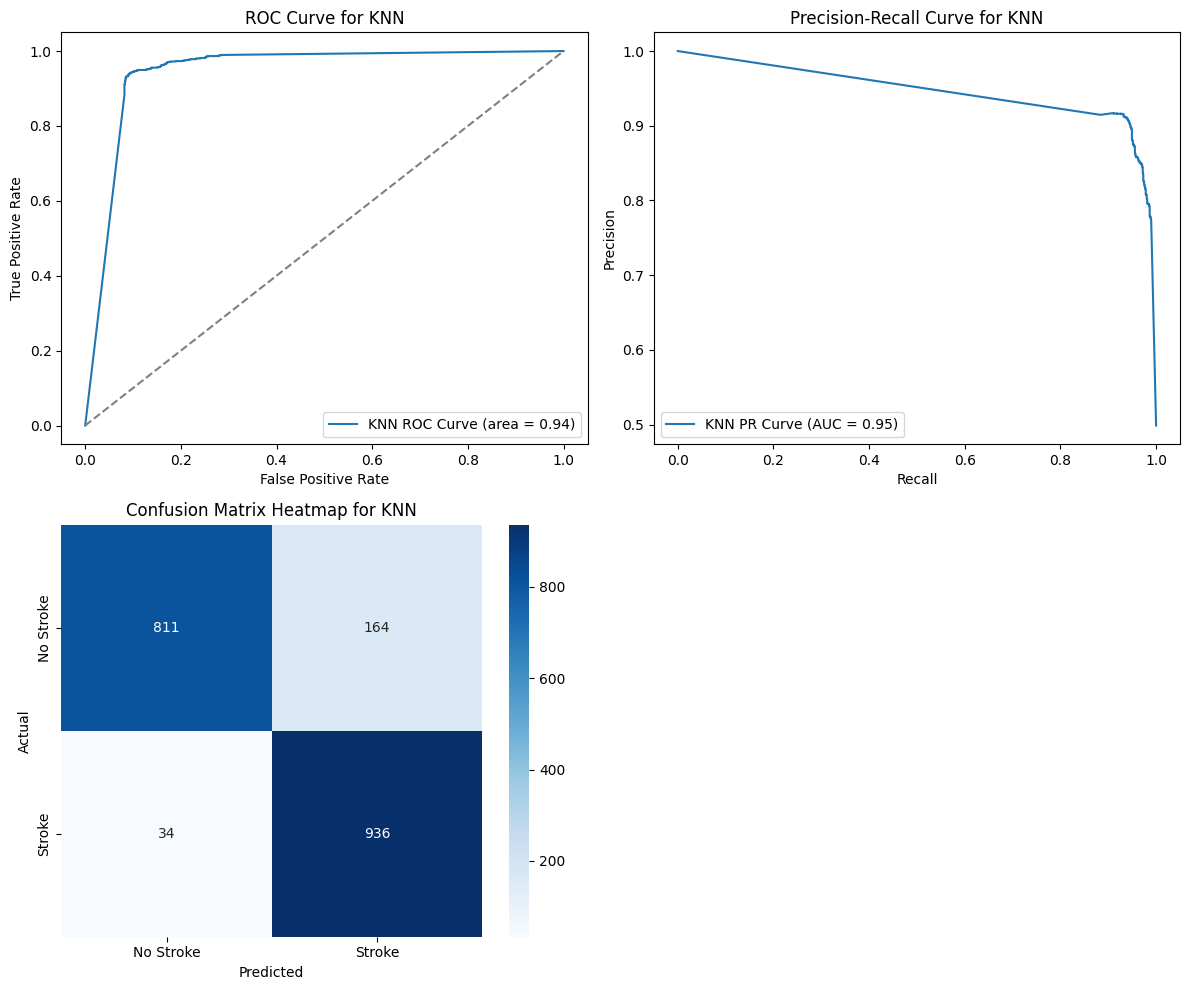


Training and evaluating SVM with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       975
           1       0.85      0.94      0.90       970

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945


Accuracy for SVM: 0.8920308483290489
ROC AUC Score for SVM: 0.9444948453608247


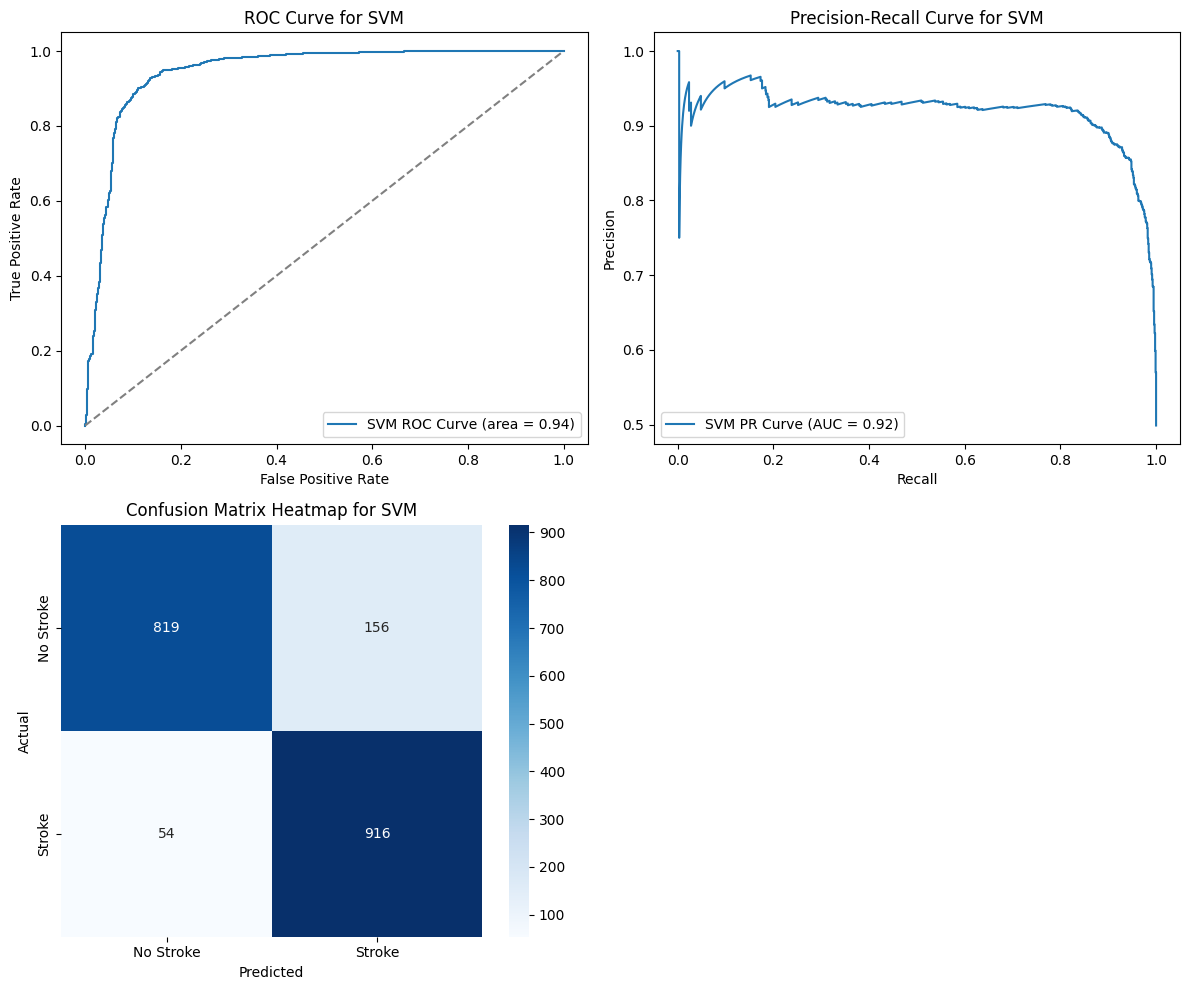


Training and evaluating Naive Bayes with GridSearchCV...

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       975
           1       0.75      0.85      0.80       970

    accuracy                           0.78      1945
   macro avg       0.79      0.78      0.78      1945
weighted avg       0.79      0.78      0.78      1945


Accuracy for Naive Bayes: 0.7830334190231363
ROC AUC Score for Naive Bayes: 0.8520740153317474


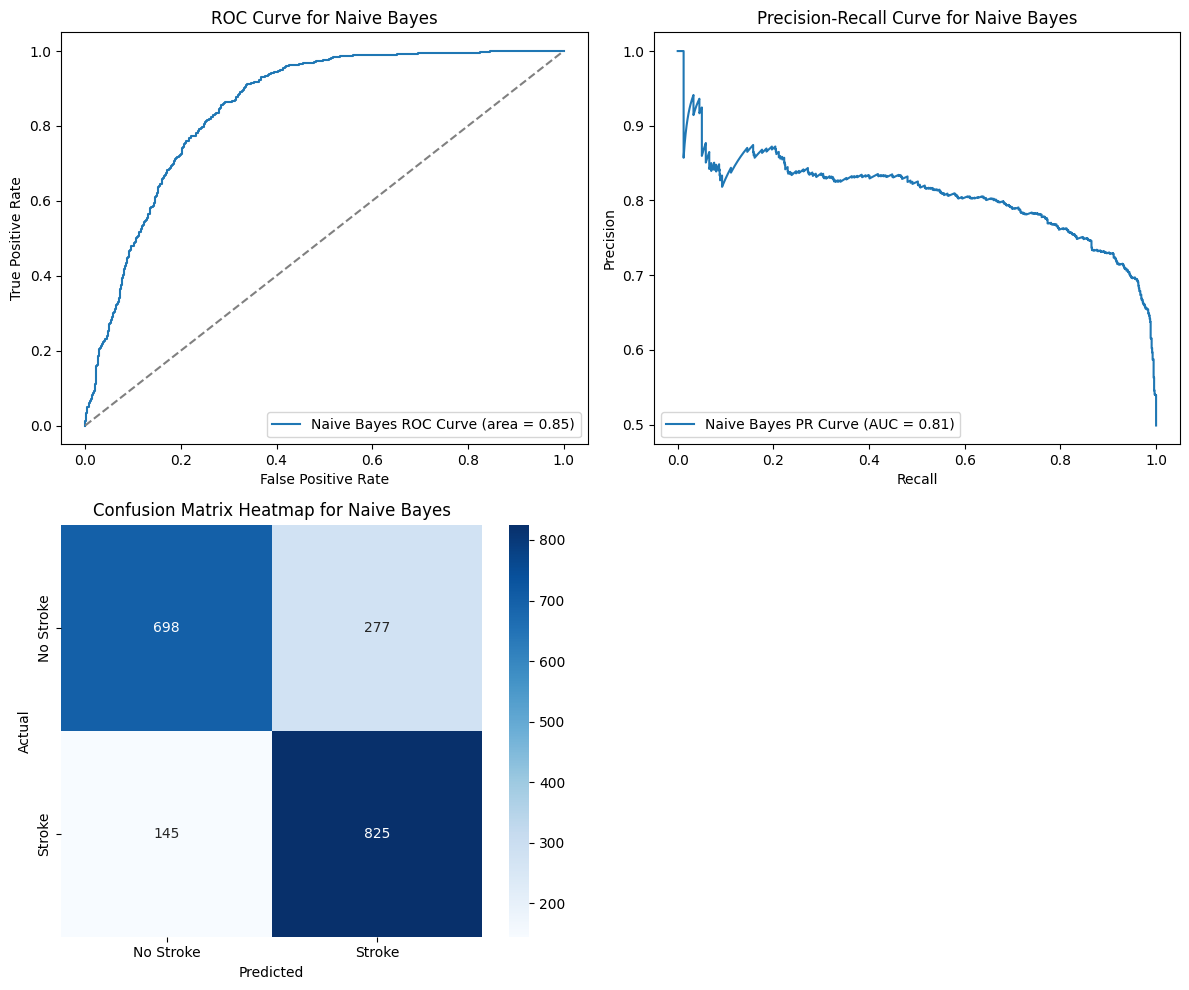


Training and evaluating Logistic Regression with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945


Accuracy for Logistic Regression: 0.8066838046272493
ROC AUC Score for Logistic Regression: 0.891736716891356


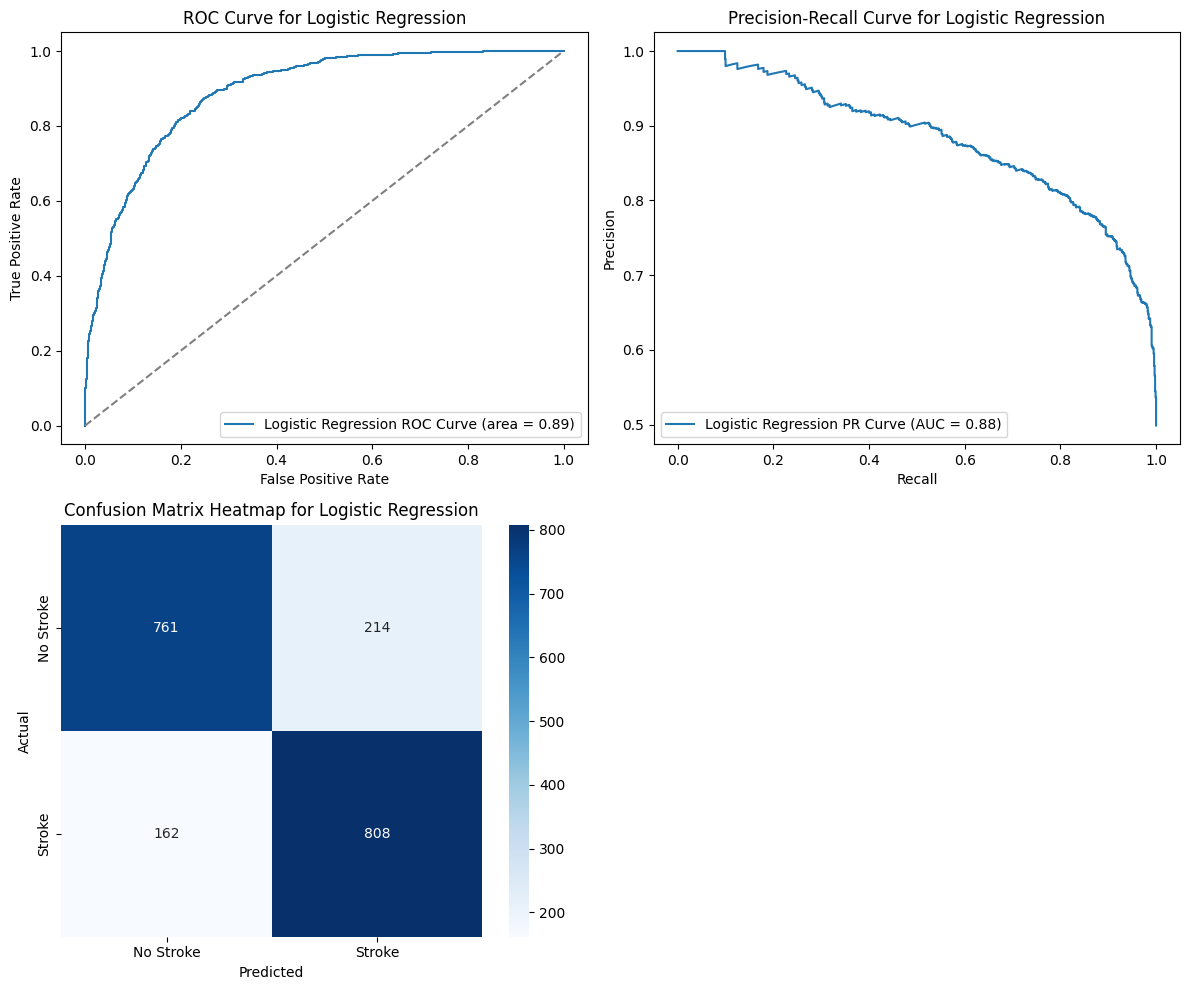


Training and evaluating Decision Tree with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       975
           1       0.88      0.93      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945


Accuracy for Decision Tree: 0.9023136246786633
ROC AUC Score for Decision Tree: 0.8994258524980174


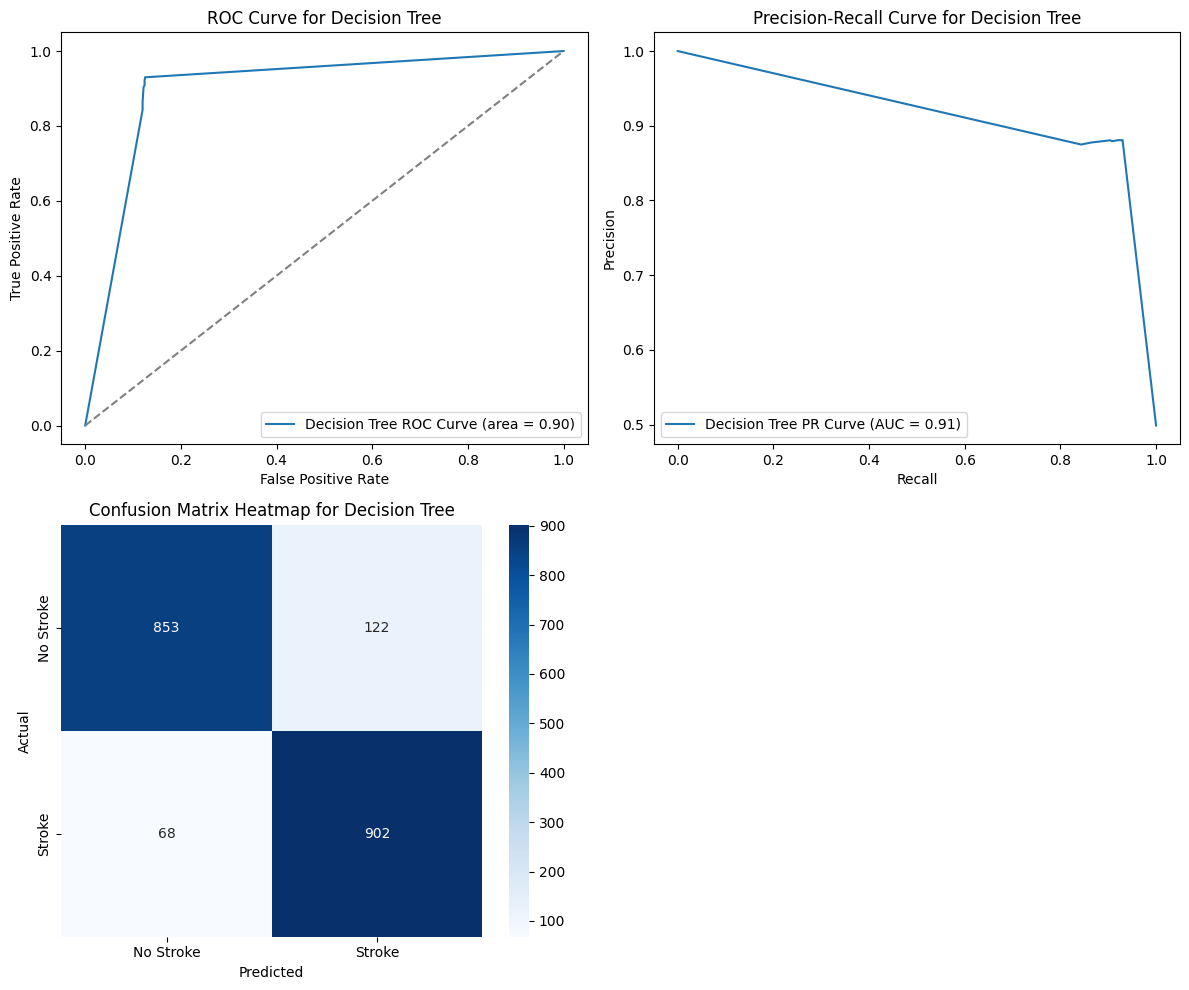


Training and evaluating Random Forest with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.93      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945


Accuracy for Random Forest: 0.9465295629820052
ROC AUC Score for Random Forest: 0.9899989426381179


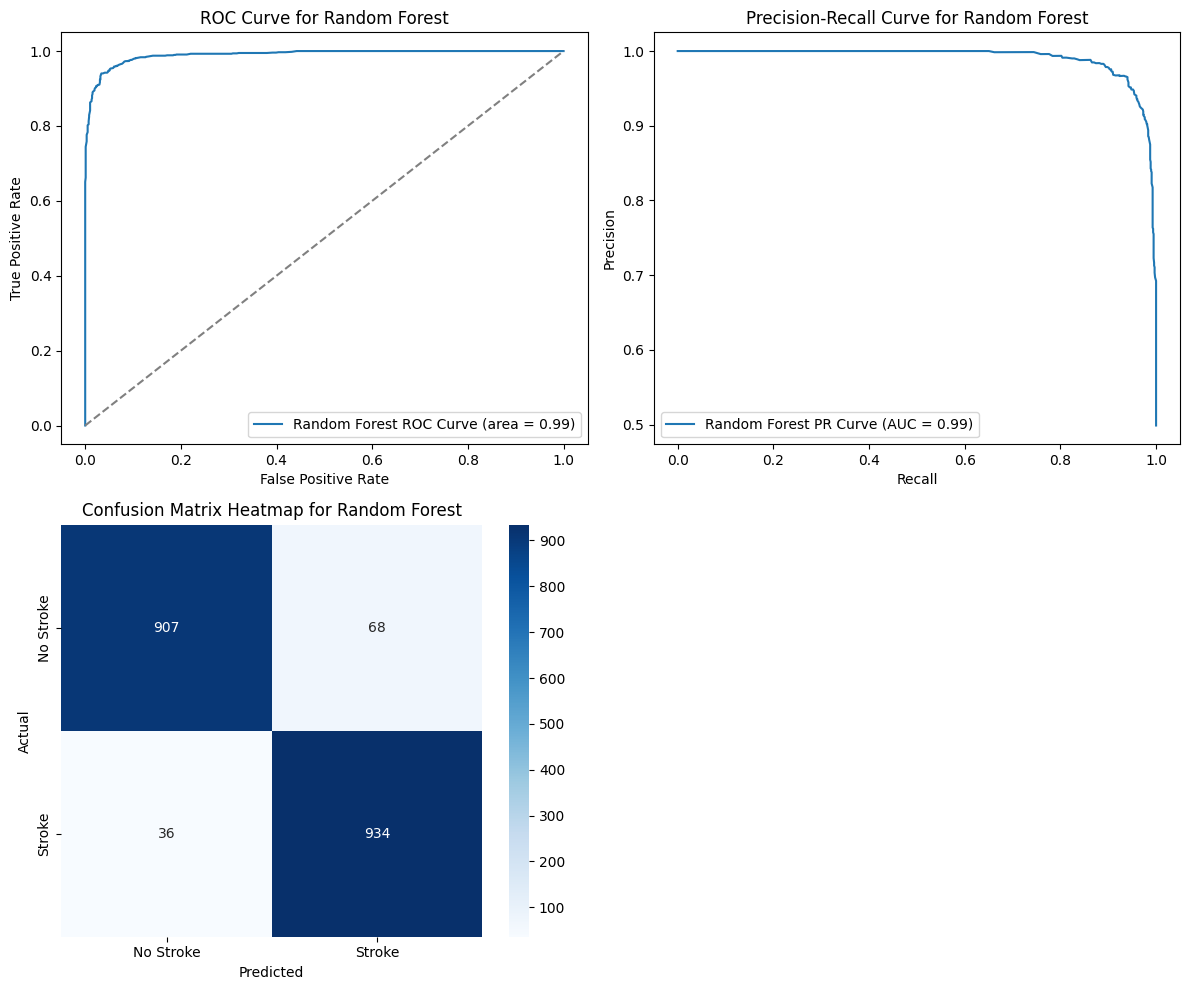

In [10]:
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name} with GridSearchCV...")

    if param_grids.get(model_name):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {model_name}: {accuracy}")

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score for {model_name}: {roc_auc}")
        
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 سطر و 2 ستون برای نمودارها
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        axs[0, 0].plot(fpr, tpr, label=f'{model_name} ROC Curve (area = %0.2f)' % roc_auc)
        axs[0, 0].plot([0, 1], [0, 1], color='gray', linestyle='--')
        axs[0, 0].set_xlabel('False Positive Rate')
        axs[0, 0].set_ylabel('True Positive Rate')
        axs[0, 0].set_title(f'ROC Curve for {model_name}')
        axs[0, 0].legend(loc='lower right')

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        axs[0, 1].plot(recall, precision, label=f'{model_name} PR Curve (AUC = %0.2f)' % pr_auc)
        axs[0, 1].set_xlabel('Recall')
        axs[0, 1].set_ylabel('Precision')
        axs[0, 1].set_title(f'Precision-Recall Curve for {model_name}')
        axs[0, 1].legend(loc='lower left')

        # Confusion Matrix 
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'], ax=axs[1, 0])
        axs[1, 0].set_title(f'Confusion Matrix Heatmap for {model_name}')
        axs[1, 0].set_xlabel('Predicted')
        axs[1, 0].set_ylabel('Actual')

        fig.delaxes(axs[1, 1])
        plt.tight_layout()
        plt.show()
